Project [link](https://www.kaggle.com/datasets/tariqsays/chatgpt-twitter-dataset)

# Sentiment Analysis and Predict next Tweet Polarity and Subjectivity

## ChatGPT Twitter Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("chatgpt1.csv")

In [3]:
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2023-01-24 06:57:56+00:00,1617778712082096128,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481992705,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0


In [4]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [5]:
df.Language.value_counts

<bound method IndexOpsMixin.value_counts of 0        ja
1        en
2        de
3        en
4        tr
         ..
49996    de
49997    de
49998    it
49999    en
50000    es
Name: Language, Length: 50001, dtype: object>

In [6]:
df.Text

0        ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...
1        @AlexandrovnaIng Prohibition of ChatGPT has be...
2        Schaut Euch an, was @fobizz @DianaKnodel alles...
3        Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
4        Profilinde vatan, Türkiye falan yazan bireyler...
                               ...                        
49996    #ChatGPT ist ein #Chatbot, der durch künstlich...
49997    @r8r Ich hab mal die AI dazu befragt (ChatGPT)...
49998    5 minuti di #chatGPT e ho capito che apprende ...
49999    Portland Shop Uses ChatGPT To Tell Family Stor...
50000    Ahora sueño con el día en que Amazon integre u...
Name: Text, Length: 50001, dtype: object

In [7]:
data = df[df.Language != "en"]

In [19]:
data2 = df[df.Language == "en"]

In [21]:
data.shape, data2.shape

((17925, 20), (32076, 20))

In [9]:
data.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
5,2023-01-22 13:45:00+00:00,1617156376983207937,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,GazeteKarinca,https://twitter.com/GazeteKarinca/status/16171...,https://twitter.com/GazeteKarinca,['https://gazetekarinca.com/chatgptnin-bilinme...,['https://t.co/daAyOpRLiM'],0,0,1,0,1617156376983207937,tr,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,[],0
12,2023-01-22 13:45:10+00:00,1617156421719838721,最新コメント15件（01/22 22:45）\n\n【1月17日 登録記事】AzureでCh...,nowtice_news2,https://twitter.com/nowtice_news2/status/16171...,https://twitter.com/nowtice_news2,['https://nowtice-news.net/3415821/'],['https://t.co/5dTba8AoXr'],0,0,0,0,1617156421719838721,ja,"<a href=""https://nowtice.net/"" rel=""nofollow"">...",NaN,NaN,NaN,[],0


In [20]:
data.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)

In [17]:
from deep_translator import GoogleTranslator

In [18]:
GoogleTranslator(source="auto", target="en").translate(data.Text[1])

'Check out what @fobizz @DianaKnodel brings to the slopes ⬇️ to take you with them.\n\n@reg_schulz starts tomorrow - and on Tue at 12 we will discuss #ChatGPT as critical friends in a live briefing with SPD chairman @EskenSaskia &amp; Diana\nhttps://t.co/DsoeVJrPBp https://t.co/HflTruResk https://t.co/7tYCx6Srp8'

In [31]:
#translated = []
for i in range(2729,len(data)):
    text = GoogleTranslator(source="auto", target="en").translate(data.Text[i])
    print(i)
    translated.append(text)
print("translation done")
data["Text"] = translated
print("df Texts updated")

2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928


ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=en&sl=auto&q=%E3%80%9016%E8%A9%B1%E3%82%A2%E3%83%B3%E3%82%B1%E3%83%BC%E3%83%88%E3%80%91%0A%E8%AA%B0%E3%81%8C%E6%AD%A2%E3%82%81%E3%82%89%E3%82%8C%E3%82%8B%E3%82%93%E3%81%A0%0A%23nijijourney+%23ChatGPT%0A%0A%E3%80%8C%E5%88%9D%E9%9F%B3%E3%83%9F%E3%82%AF%E3%81%AF%E5%8D%A0%E9%A0%98%E3%81%97%E3%81%9F%E5%9B%BD%E3%80%85%E3%82%92 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C9CEE44820>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [30]:
translated[2729]

IndexError: list index out of range

In [ ]:
data.groupby("Language")["Language"].value_counts()[:40]

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

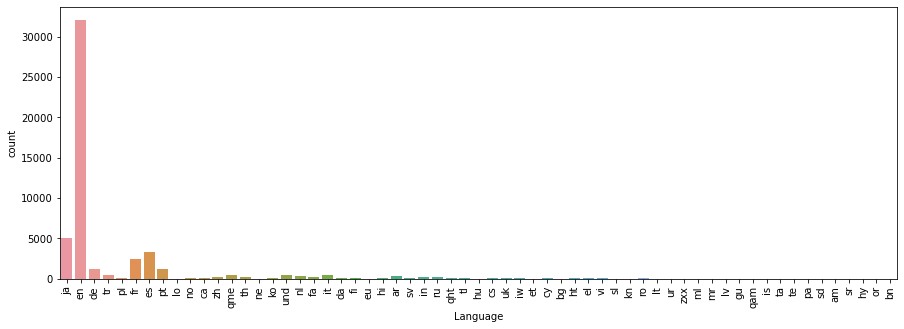

In [41]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data.Language);

In [29]:
data = df[df["Language"] == "en"]

In [30]:
data.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [47]:
data = data[["Text",'ReplyCount', 'RetweetCount', 'LikeCount','QuoteCount']]

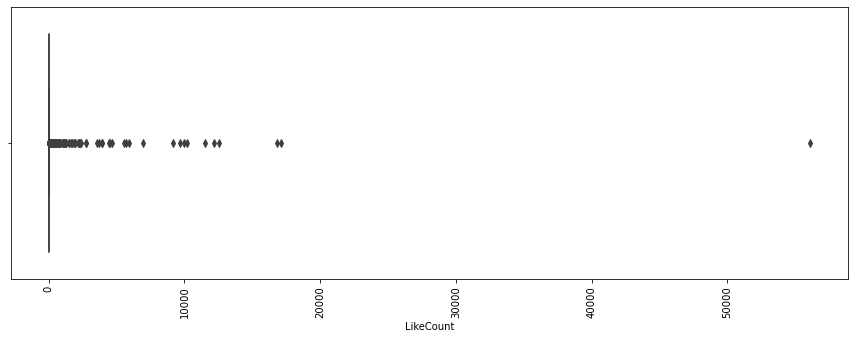

In [48]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(df.LikeCount);

In [49]:
df[["LikeCount"]].describe()

,LikeCount
count,50001.000000
mean,9.696326
std,313.524215
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,56073.000000


In [50]:
data['Text']=data['Text'].str.lower()
data['Text']=data['Text'].str.replace('[^\w\s]','')
data['Text']=data['Text'].str.replace('\n','')
data['Text']=data['Text'].str.replace('\d+','')
data['Text']=data['Text'].str.replace('\r','')

In [51]:
data.Text

1        alexandrovnaing prohibition of chatgpt has bee...
3                    bow down to chatgpt  httpstcoentsziaq
6        chatgpt runs k nvidia training gpus with poten...
7        swengdad there is repetitive work in every job...
8        i created a fictional jewelry brand using chat...
                               ...                        
49991    i joined the aipadtech x moonsalecom exclusive...
49992    iamjohnoliver i think chatgpt is taking the pi...
49993    digital marketers adopt new skills artificial ...
49995    remember when twitter was down a lot in the ea...
49999    portland shop uses chatgpt to tell family stor...
Name: Text, Length: 32076, dtype: object

## Sentiment Analysis

In [52]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [53]:
data["sentiment"] = data["Text"].apply(detect_sentiment)

In [54]:
data.head()

,Text,ReplyCount,RetweetCount,LikeCount,QuoteCount,sentiment
1,alexandrovnaing prohibition of chatgpt has bee...,1,0,5,0,0.000000
3,bow down to chatgpt httpstcoentsziaq,0,0,2,0,-0.155556
6,chatgpt runs k nvidia training gpus with poten...,0,0,0,0,0.250000
7,swengdad there is repetitive work in every job...,1,0,3,0,-0.083333
8,i created a fictional jewelry brand using chat...,0,1,2,1,0.000000


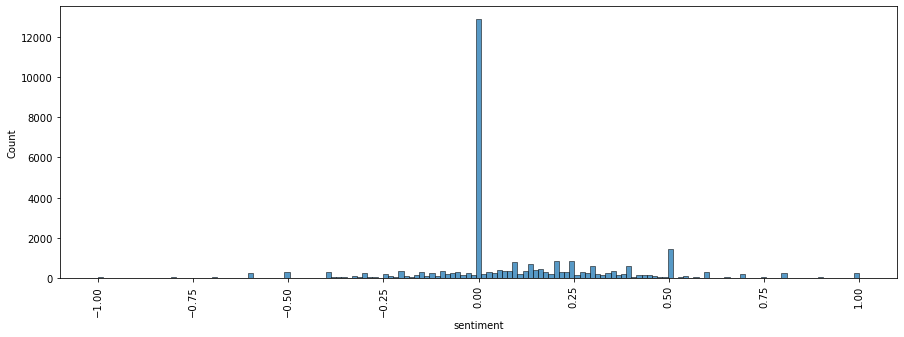

In [57]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.histplot(data.sentiment);

In [58]:
# 0 nötr 1 pozitif 2 negatif
def sntmnt(score):
    if score>0.2:
        return 1
    elif score< (-0.2):
        return 2
    else:
        return 0

In [59]:
data["class"] = data["sentiment"].apply(sntmnt)

In [60]:
data.head()

,Text,ReplyCount,RetweetCount,LikeCount,QuoteCount,sentiment,class
1,alexandrovnaing prohibition of chatgpt has bee...,1,0,5,0,0.000000,0
3,bow down to chatgpt httpstcoentsziaq,0,0,2,0,-0.155556,0
6,chatgpt runs k nvidia training gpus with poten...,0,0,0,0,0.250000,1
7,swengdad there is repetitive work in every job...,1,0,3,0,-0.083333,0
8,i created a fictional jewelry brand using chat...,0,1,2,1,0.000000,0


In [62]:
data["group"] = data["class"].replace({0:"neutral", 1:"positive", 2:"negative"})

In [63]:
data.head()

,Text,ReplyCount,RetweetCount,LikeCount,QuoteCount,sentiment,class,group
1,alexandrovnaing prohibition of chatgpt has bee...,1,0,5,0,0.000000,0,neutral
3,bow down to chatgpt httpstcoentsziaq,0,0,2,0,-0.155556,0,neutral
6,chatgpt runs k nvidia training gpus with poten...,0,0,0,0,0.250000,1,positive
7,swengdad there is repetitive work in every job...,1,0,3,0,-0.083333,0,neutral
8,i created a fictional jewelry brand using chat...,0,1,2,1,0.000000,0,neutral


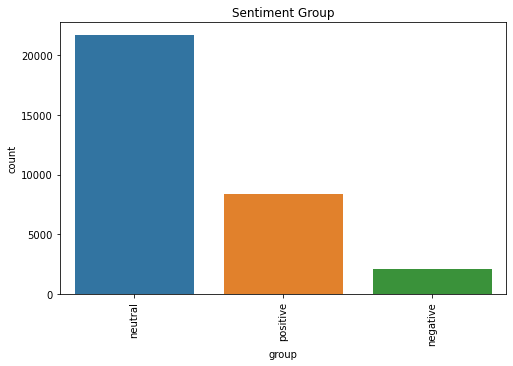

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["group"])
plt.title("Sentiment Group")
plt.xticks(rotation=90);

## Predicting the Group of Next Tweet Category with Machine Learning

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer 
pr=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [85]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [86]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [87]:
x=data["Text"]
y=data["group"]

In [88]:
y.value_counts()

neutral     21655
positive     8343
negative     2078
Name: group, dtype: int64

In [ ]:
x

In [89]:
x=vect.fit_transform(x)

In [90]:
x

<32076x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 578628 stored elements in Compressed Sparse Row format>

### Machine Learning Classification

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

#### Logistic Regression

In [94]:
l=LogisticRegression()

In [95]:
l.fit(x_train,y_train)

LogisticRegression()

In [96]:
pred1=l.predict(x_test)

In [97]:
accuracy_score(pred1,y_test)

0.8483478802992519

#### Decision Tree Classification

In [98]:
d=DecisionTreeClassifier()

In [99]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
pred2 = d.predict(x_test)

In [109]:
accuracy_score(pred2,y_test)

0.8033042394014963